# ARIMA (AutoRegressive Integrated Moving Average)

 **The general process for ARIMA models is the following:**

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

# Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

# Collect Data

In [2]:
df = pd.read_csv(r"E:\Data Science\Datasets\monthlysales.csv")
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [4]:
df.shape[0]

107

In [5]:
df.columns = ['Month','Passengers']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       106 non-null    object 
 1   Passengers  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


# Clean Data

In [7]:
df.isnull().sum()

Month         1
Passengers    2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Month,Passengers
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [10]:
df.columns = ['Month','Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

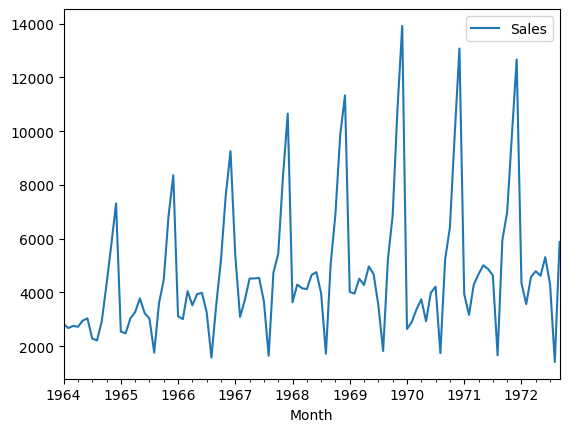

In [12]:
df.plot()

In [13]:
#Null hypothsis (H0) : It is not stationary
#Alternative hypothsis (H1) : It is stationary
#Confidence interval : 95%
#adfuller always assume that (H0) is (Not stationary)
p_value = adfuller(df['Sales'])[1]
print(p_value,p_value<0.05)

0.363915771660244 False


In [14]:
# Since the p-value > 0.05
# We accept the null hypothisis (Not stationary)
# Now we need to transform this data to be stationary
# We will use (Differencing) method to achieve this

# Differencing

In [15]:
# If your data exhibits clear monthly seasonality, and you want to remove monthly effects,
# differencing by 1 (shift of 1) is more appropriate.
# If your data has more extended seasonal patterns that repeat annually, and you want to eliminate yearly effects,
# differencing by 12 (shift of 12) is more appropriate.
# We conclude from the graph that seasonal patterns repeated annually

In [16]:
Sales_diff = (df['Sales'] - df['Sales'].shift(12)).dropna()
Sales_diff

Month
1965-01-01   -274.0
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Sales, Length: 93, dtype: float64

In [17]:
#Test again
p_value = adfuller(Sales_diff)[1]
print(p_value, p_value < 0.05)
#Since p-value < 0.05 we reject the null hypothsis (Stationary)

2.060579696813685e-11 True


<Axes: xlabel='Month'>

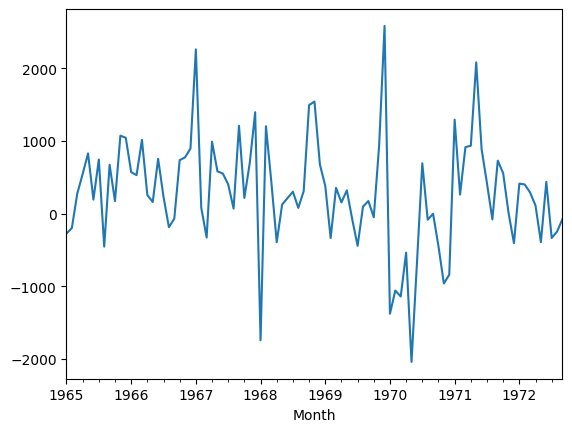

In [18]:
Sales_diff.plot()
#Stationary graph

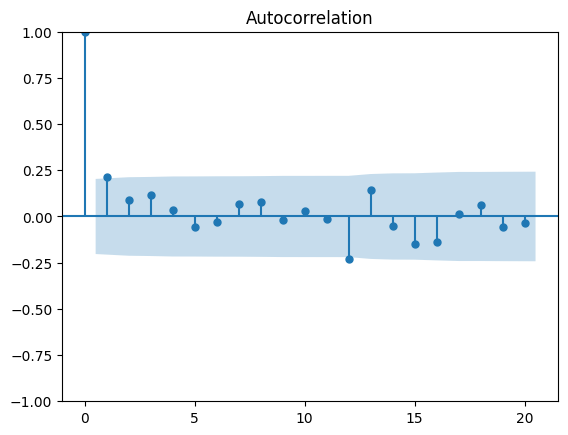

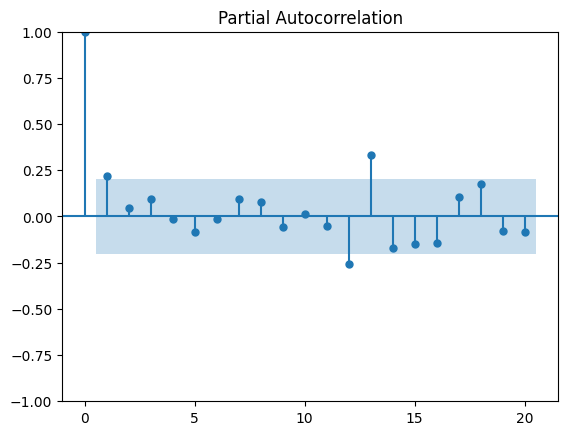

In [19]:
plot_acf(Sales_diff);
plot_pacf(Sales_diff);

## ARIMA Model

In [20]:
# We assume from our graphs that (p=1,d=1,q=0 or q=1)
# To know the best modelling values for (p,d,q)
auto_arima(Sales_diff,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1500.884, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1498.453, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1498.864, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1511.271, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1500.270, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.341, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1502.216, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1503.527, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [21]:
#We conclude that the best model to apply is (p=1,d=0,q=0)

# We need to discuss two important libraries
- ARIMA (AutoRegressive Integrated Moving Average):

Use ARIMA when: You have a time series dataset that exhibits autocorrelation (dependency on its past values) but doesn't have clear seasonal patterns (If your time series data has no clear seasonality, ARIMA is appropriate)

- SARIMAX (Seasonal ARIMA with Exogenous Variables):

Use SARIMAX when: You have a time series dataset with both autocorrelation and clear seasonal patterns, and you want to include exogenous (external) variables in your forecasting model (If your data exhibits both autocorrelation and seasonality, and you have external factors that influence the time series, SARIMAX is more suitable.)
**Both are time series forecasting models, but they are used in different situations**

In [22]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 0, 0),#p,d,q in order
                                seasonal_order=(1,0,0,12))#12 describe the differences shift that we did
results=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

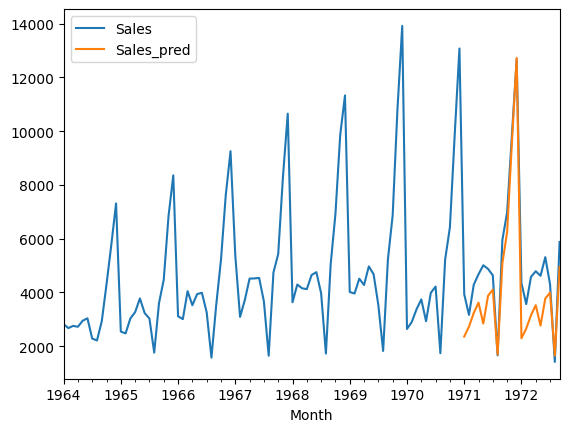

In [23]:
#Start and end describe the index of the portion of data we want to predict (Test)
df['Sales_pred']=results.predict(start=84,end=105,dynamic=True)
df[['Sales','Sales_pred']].plot()

# Now we need to predict the sales for the next two years (1972,1973)

In [24]:
Future_sales =[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
Future_sales_df =pd.DataFrame(index=Future_sales[1:],columns=df.columns)
Future_sales_df.index #Our new dates

DatetimeIndex(['1972-10-01', '1972-11-01', '1972-12-01', '1973-01-01',
               '1973-02-01', '1973-03-01', '1973-04-01', '1973-05-01',
               '1973-06-01', '1973-07-01', '1973-08-01', '1973-09-01',
               '1973-10-01', '1973-11-01', '1973-12-01', '1974-01-01',
               '1974-02-01', '1974-03-01', '1974-04-01', '1974-05-01',
               '1974-06-01', '1974-07-01', '1974-08-01'],
              dtype='datetime64[ns]', freq=None)

In [25]:
df = pd.concat([df,Future_sales_df])

<Axes: >

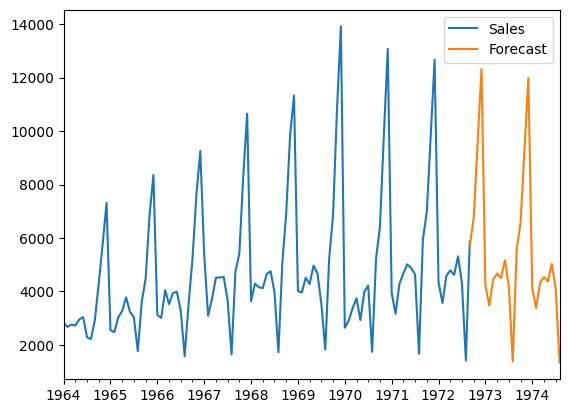

In [26]:
df['Forecast'] = results.predict(start = 104, end = 129, dynamic= True)  
df[['Sales', 'Forecast']].plot()